In [ ]:
pip install numpy pandas matplotlib seaborn openpyxl 

In [6]:
import pandas as pd 
df = pd.read_excel(r"C:\Users\91897\Downloads\SalesData.xlsx")
print(df.head())

  Order Date  Year  Order Qty  Cost of Sales      Sales       Profit Channel  \
0 2019-05-16  2019          9     958.552406  2714.7200  1756.167594   Store   
1 2018-04-22  2018          4      18.624692    50.1414    31.516708   Store   
2 2018-03-10  2018          9     205.101455  1395.1128  1190.011345   Store   
3 2020-04-12  2020         18       6.619718   462.4200   455.800282   Store   
4 2019-03-17  2019          9       4.807085  2614.4000  2609.592915  Online   

                                     Product Name       Manufacturer  \
0                    Contoso SLR Camera M143 Grey       Contoso, Ltd   
1               Contoso 512MB MP3 Player E51 Blue       Contoso, Ltd   
2  Contoso DVD 9-Inch Player Portable M300 Silver       Contoso, Ltd   
3         NT Bluetooth Stereo Headphones E52 Pink  Northwind Traders   
4                    Contoso SLR Camera M143 Grey       Contoso, Ltd   

          Brand Name  Product Sub Category               Product Category  \
0        

In [9]:
print("columns")
print(df.columns)

columns
Index(['Order Date', 'Year', 'Order Qty', 'Cost of Sales', 'Sales', 'Profit',
       'Channel', 'Product Name', 'Manufacturer', 'Brand Name',
       'Product Sub Category', 'Product Category', 'Region', 'City',
       'Country'],
      dtype='object')


In [12]:
df.drop_duplicates(inplace=True)

In [21]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

In [22]:
df['Month'] = df['Order Date'].dt.to_period('M')

In [23]:
df['Profit Margin (%)'] = (df['Profit'] / df['Sales']) * 100

In [24]:
df.head()

,Order Date,Year,Order Qty,Cost of Sales,Sales,Profit,Channel,Product Name,Manufacturer,Brand Name,Product Sub Category,Product Category,Region,City,Country,Month,Profit Margin (%)
0,2019-05-16,2019,9,958.552406,2714.7200,1756.167594,Store,Contoso SLR Camera M143 Grey,"Contoso, Ltd",Contoso,Digital SLR Cameras,Cameras and camcorders,Europe,Moscow,Russia,2019-05,64.690561
1,2018-04-22,2018,4,18.624692,50.1414,31.516708,Store,Contoso 512MB MP3 Player E51 Blue,"Contoso, Ltd",Contoso,MP4&MP3,Audio,Europe,Moscow,Russia,2018-04,62.855661
2,2018-03-10,2018,9,205.101455,1395.1128,1190.011345,Store,Contoso DVD 9-Inch Player Portable M300 Silver,"Contoso, Ltd",Contoso,Movie DVD,"Music, Movies and Audio Books",Europe,Moscow,Russia,2018-03,85.298575
3,2020-04-12,2020,18,6.619718,462.4200,455.800282,Store,NT Bluetooth Stereo Headphones E52 Pink,Northwind Traders,Northwind Traders,Bluetooth Headphones,Audio,North America,Bellevue,United States,2020-04,98.568462
4,2019-03-17,2019,9,4.807085,2614.4000,2609.592915,Online,Contoso SLR Camera M143 Grey,"Contoso, Ltd",Contoso,Digital SLR Cameras,Cameras and camcorders,Asia,Beijing,China,2019-03,99.816130


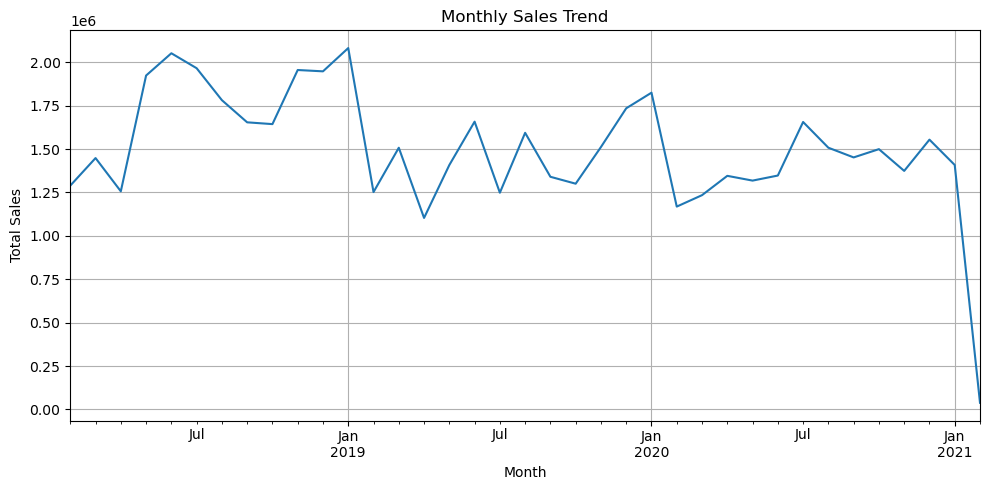

In [25]:
import matplotlib.pyplot as plt

monthly_sales = df.groupby('Month')['Sales'].sum()

monthly_sales.plot(kind='line', title='Monthly Sales Trend', figsize=(10,5))
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

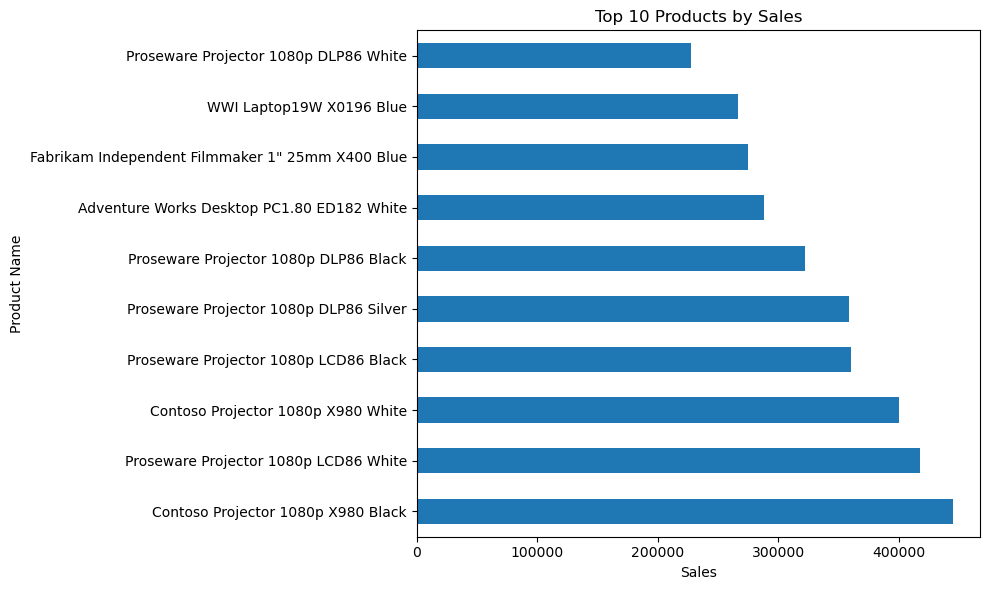

In [26]:
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

top_products.plot(kind='barh', title='Top 10 Products by Sales', figsize=(10,6))
plt.xlabel('Sales')
plt.tight_layout()
plt.show()

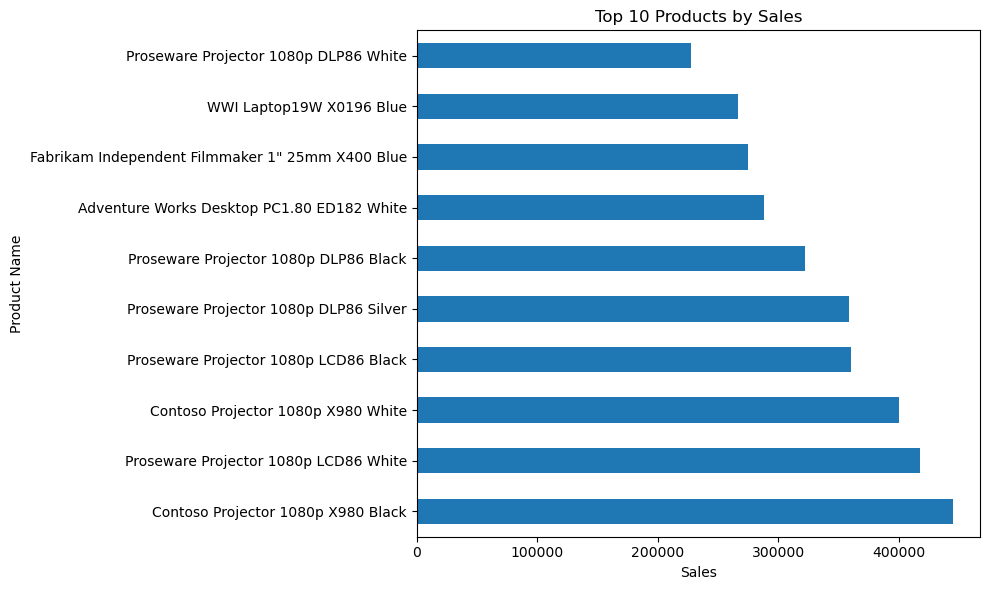

In [27]:
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

top_products.plot(kind='barh', title='Top 10 Products by Sales', figsize=(10,6))
plt.xlabel('Sales')
plt.tight_layout()
plt.show()

In [28]:
df.to_excel("cleaned_sales_data.xlsx", index=False)